In [28]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Load data

In [31]:
data = np.loadtxt('2_spin_system_uniform_medium_12_12_2024_entangled_mean_error.txt', skiprows=1)
meta_data_entangled = np.loadtxt('2_spin_system_uniform_medium_12_12_2024_entangled_mean_error.txt', max_rows=1, dtype=str)

t = np.arange(0, len(data[0]), dtype=float)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0) / np.sqrt(len(data))
print(meta_data_entangled)



data_non_entangled = np.loadtxt('2_spin_system_uniform_medium_12_12_2024_non_entangled_mean_error.txt', skiprows=1)
meta_data = np.loadtxt('2_spin_system_uniform_medium_12_12_2024_non_entangled_mean_error.txt', max_rows=1, dtype=str)

print(meta_data)

t_non_entangled = np.arange(0, len(data_non_entangled[0]), dtype=float)
mean_non_entangled = np.mean(data_non_entangled, axis=0)
std_non_entangled = np.std(data_non_entangled, axis=0) / np.sqrt(len(data_non_entangled))


t *= 0.001 * 2
t_non_entangled *= 0.001 * 2

/tmp/ipykernel_755752/3237063634.py:1: UserWarning: loadtxt: input contained no data: "2_spin_system_uniform_medium_12_12_2024_entangled_mean_error.txt"
  data = np.loadtxt('2_spin_system_uniform_medium_12_12_2024_entangled_mean_error.txt', skiprows=1)


IndexError: index 0 is out of bounds for axis 0 with size 0

# Plot

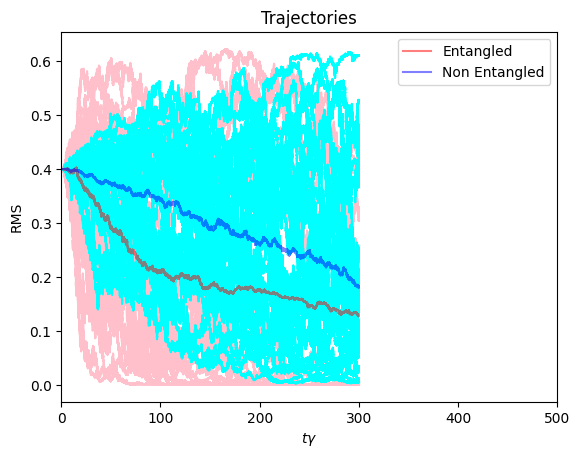

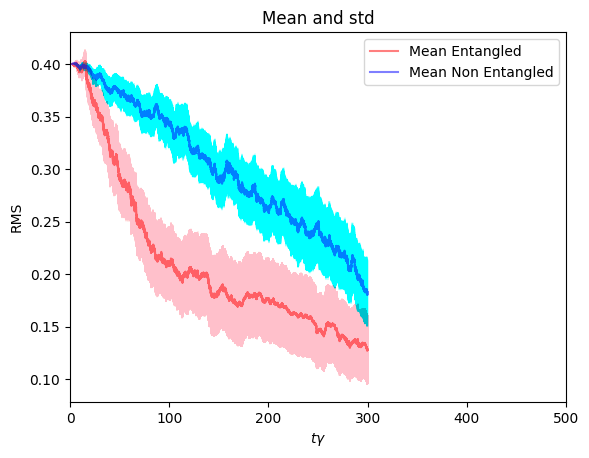

In [27]:
#plt.errorbar(t, mean, yerr=std, fmt='')
plt.plot(t, data.T, color='pink')
plt.plot(t_non_entangled, data_non_entangled.T, color='cyan')
plt.plot(t, mean, color='red', label='Entangled', alpha=0.5)
plt.plot(t_non_entangled, mean_non_entangled, color='blue', label='Non Entangled', alpha=0.5)
plt.title('Trajectories')
plt.xlabel('$t\gamma$')
plt.ylabel('RMS')
plt.legend(loc='upper right')
plt.xlim(0, 500)
plt.show()

plt.errorbar(t, mean, yerr=std, fmt='', color='pink', alpha=0.002)
plt.errorbar(t_non_entangled, mean_non_entangled, yerr=std_non_entangled, fmt='', color='cyan', alpha=0.002)
plt.plot(t, mean, color='red', label='Mean Entangled', alpha=0.5)
plt.plot(t_non_entangled, mean_non_entangled, label='Mean Non Entangled', color='blue', alpha=0.5)
plt.title('Mean and std')
plt.xlabel('$t\gamma$')
plt.ylabel('RMS')
plt.legend(loc='upper right')
plt.xlim(0, 500)
plt.show()


# Fit

## Find good guess

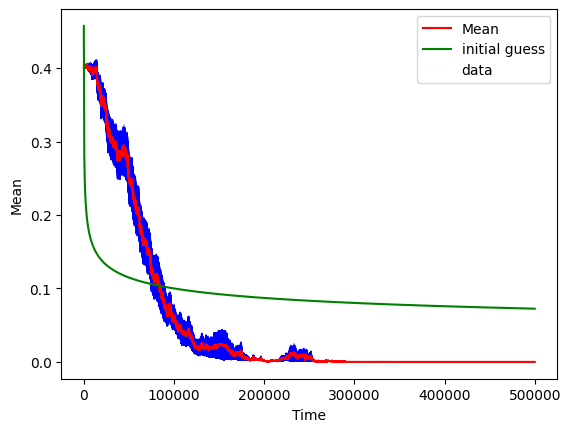

In [63]:
def fit_func(t, a, b, c, d):
    return ((a * t + b)) ** (-d) + c

t_fit = np.linspace(0, len(data[0]), 1000, )

a_guess = 1
b_guess = 50
c_guess = 0
d_guess = 0.2

y_fit = fit_func(t_fit, a_guess, b_guess, c_guess, d_guess)



plt.errorbar(t, mean, yerr=std, fmt='', color='blue', label='data', alpha=0.002)
plt.plot(t, mean, color='red', label='Mean')
plt.plot(t_fit, y_fit, label='initial guess', color='green')
plt.xlabel('Time')
plt.ylabel('Mean')
plt.legend()
plt.show()

In [61]:


least_squares = LeastSquares(t[:250000], mean[:250000], std[:250000], fit_func)

m = Minuit(least_squares, a=a_guess, b=b_guess, c=c_guess, d=c_guess)

m.migrad()

a_fit = m.values[0]
b_fit = m.values[1]
c_fit = m.values[2]
d_fit = m.values[3]
print('a_fit : ', a_fit, '+- ', m.errors[0])
print('b_fit : ', b_fit, '+- ', m.errors[1])
print('c_fit : ', c_fit, '+- ', m.errors[2])
print('d_fit : ', d_fit, '+- ', m.errors[3])




/tmp/ipykernel_372409/331157991.py:2: RuntimeWarning: invalid value encountered in power
  return ((a * t + b)) ** (-d) + c


a_fit :  9.619753501325868e-09 +-  1.854807629534859e-12
b_fit :  5.438679575778287 +-  8.348976373467743e-15
c_fit :  -0.344065522404588 +-  2.699204291212829e-16
d_fit :  0.17456146595007407 +-  3.716392226974873e-16


# Plot With Fit

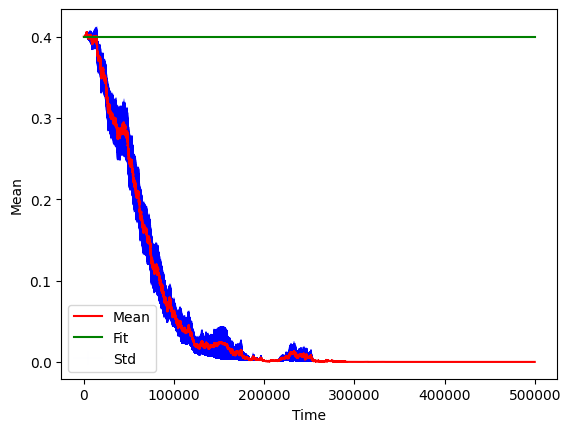

In [62]:
t_fit = np.linspace(0, len(data[0]), 1000)
y_fit = fit_func(t_fit, a_fit, b_fit, c_fit, d_fit)

plt.errorbar(t, mean, yerr=std, fmt='', label='Std', alpha=0.002, color='blue')
plt.plot(t, mean, color='red', label='Mean')
plt.plot(t_fit, y_fit, label='Fit', color='Green')
plt.xlabel('Time')
plt.ylabel('Mean')
plt.legend()
plt.show()